In [1]:
# import packages and verify versions

# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__)

numpy: 1.19.4
scipy: 1.6.2
matplotlib: 3.3.3
pandas: 1.2.4
sklearn: 0.24.2


Automatically created module for IPython interactive environment


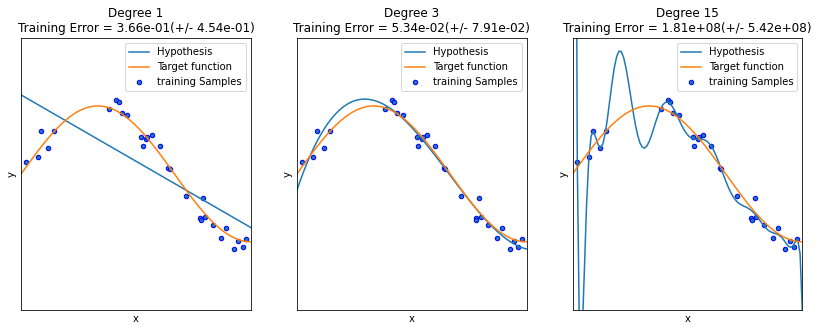

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
print(__doc__)


def true_fun(X):
    return np.sin(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
# degrees for polynomial functions
degrees = [1, 3, 15]

X = np.sort(np.random.rand(n_samples))
noise = np.random.randn(n_samples) * 0.1
y = true_fun(X) + noise

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    # setp = "set property": setp(obj, *args, **kwargs)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    # Evaluate the models using cross-validation
    # cross_val_score:
    #   cv: split number to cross-evaluate
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Hypothesis")
    plt.plot(X_test, true_fun(X_test), label="Target function")
    # plt.satter:
    #   s: size(default=20)
    plt.scatter(X, y, edgecolor='b', s=20, label="training Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nTraining Error = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Bias Variance Error
Polynomial Regression with degree 1 and degree 12 both trying to fit a target function dawn from sine function in one dimention to illustrate bias, variance and total error.

Automatically created module for IPython interactive environment
Poly deg=1: 0.2062 (error) = 0.1870 (bias^2)  + 0.0089 (var) + 0.0098 (noise)
Poly deg=12: 2.5249 (error) = 0.0453 (bias^2)  + 2.4698 (var) + 0.0098 (noise)


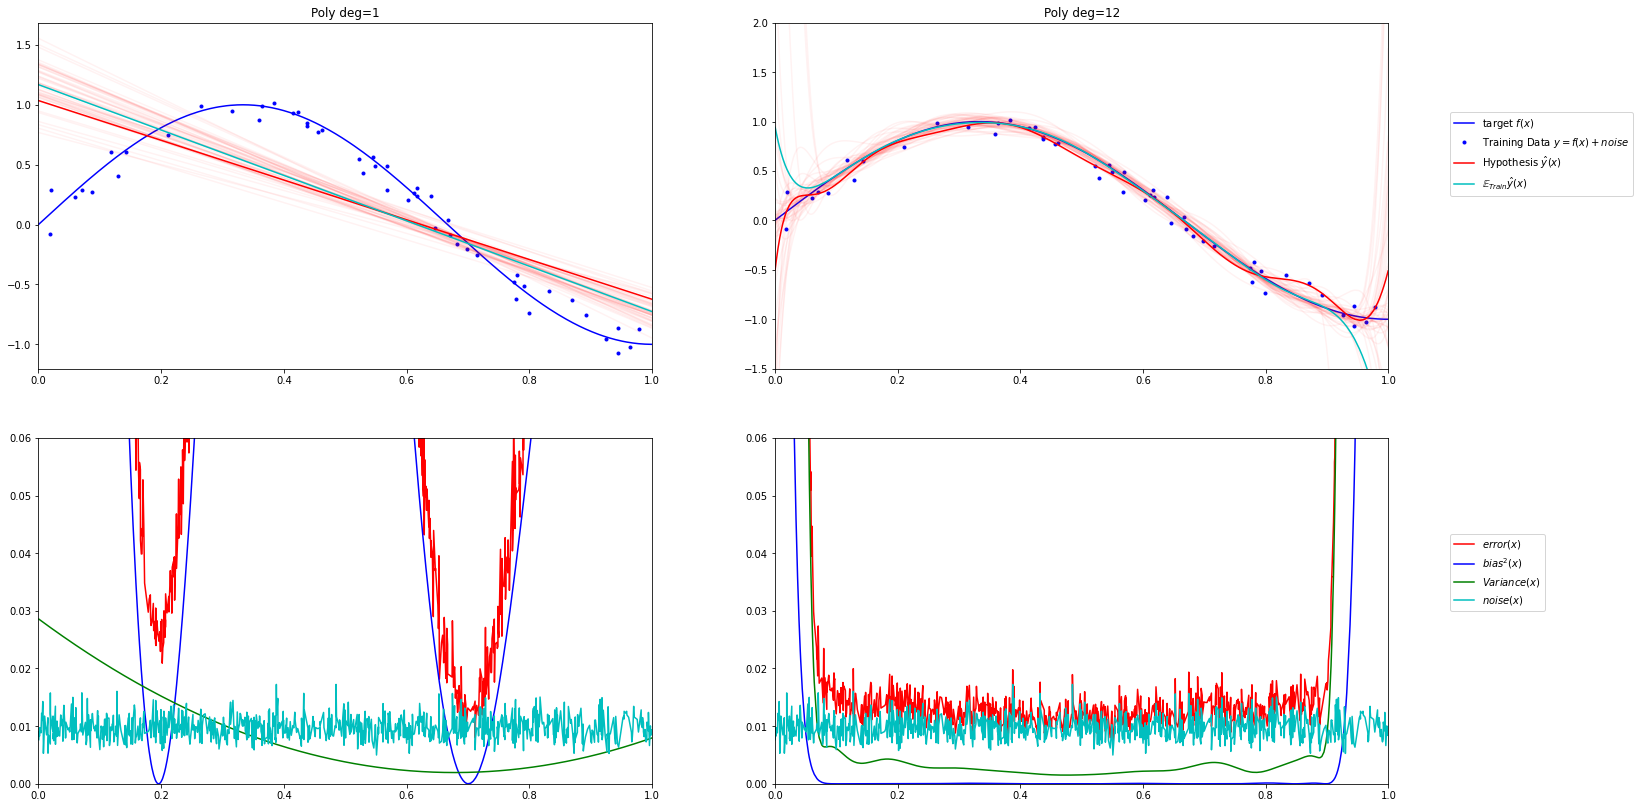

In [3]:
print(__doc__)

# Author: Gilles Louppe <g.louppe@gmail.com>, Uday Kamath<kamathuday@gmail.com>
# License: BSD 3 clause
# extended this code and changed it to reflect bias, variance and error

import numpy as np
import matplotlib.pyplot as plt


# Settings
n_repeat = 50 # Number of iterations for computing expectations
n_train = 50 # Size of the training set
n_test = 1000 # Size of the test set
noise = 0.1 # Standard deviation of the noise
np.random.seed(0)

# three polynomials with degree 1,
# and degree 12 polynomial. The impact on bias, variance and error on all three
# can be seen through this example
polynomial_features1 = PolynomialFeatures(degree=1,
                                          include_bias=False)
linear_regression1 = LinearRegression()
pipeline1 = Pipeline([("polynomial_features", polynomial_features1),
                      ("linear_regression", linear_regression1)])

polynomial_features2 = PolynomialFeatures(degree=1,
                                          include_bias=False)
polynomial_features3 = PolynomialFeatures(degree=12,
                                          include_bias=False)
linear_regression3 = LinearRegression()
pipeline3 = Pipeline([("polynomial_features", polynomial_features3),
                      ("linear_regression", linear_regression3)])
estimators = [("Poly deg=1", pipeline1), ("Poly deg=12", pipeline3)]

n_estimators = len(estimators)


# Generate data with sine function
def f(x):
    # ravel: almost same as flatten
    x = x.ravel()
    return np.sin(1.5 * np.pi * x)

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples)
    X = np.sort(X)
    
    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))
        
        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)
            
    X = X.reshape((n_samples, 1))
    
    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)
    
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(30, 14))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))
    
    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)
        
    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)
    
    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2
            
    y_error /= (n_repeat * n_repeat)
    
    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)
    
    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))
    
    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="target $f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="Training Data $y = f(x)+noise$")
    
    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label="Hypothesis $\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)
            
    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label="$\mathbb{E}_{Train} \^y(x)$")
    
    plt.xlim([0, 1])
    plt.title(name)
    
    if n == n_estimators - 1:
        plt.ylim([-1.5, 2])
        plt.legend(loc=(1.1, .5))
        
    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$")
    plt.plot(X_test, y_var, "g", label="$Variance(x)$")
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")
    
    plt.xlim([0, 1])
    plt.ylim([0, 0.06])
    
    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=0.75)
plt.show()